# Alucar - Analisando as vendas

In [44]:
import pandas as pd

In [45]:
alucar = pd.read_csv('../data/alucar.csv')

In [46]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [47]:
print('Quantidade de linhas e colunas:',alucar.shape)

Quantidade de linhas e colunas: (24, 2)


In [48]:
print('Quantidade de dados nulos:',alucar.isna().sum().sum())

Quantidade de dados nulos: 0


In [49]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [50]:
alucar.mes = pd.to_datetime(alucar.mes)

In [51]:
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [52]:
!pip install seaborn==0.9.0
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

You should consider upgrading via the 'a:\documentos\meusprojetos\data_science\cursos_alura\introdução_a_analise_de_series_temporais\venv\scripts\python.exe -m pip install --upgrade pip' command.


<AxesSubplot:xlabel='mes', ylabel='vendas'>

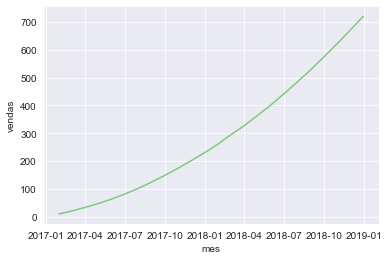

In [53]:
sns.lineplot(x='mes', y='vendas', data=alucar)

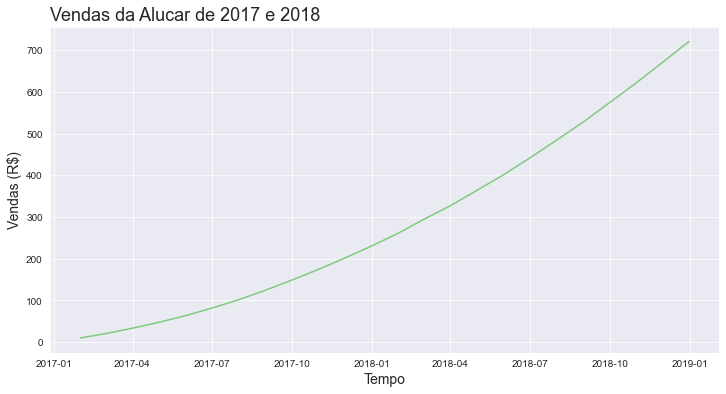

In [54]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas da Alucar de 2017 e 2018', loc='Left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14)
ax = ax

In [55]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [56]:
alucar['aumento'] = alucar['vendas'].diff()

In [57]:
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


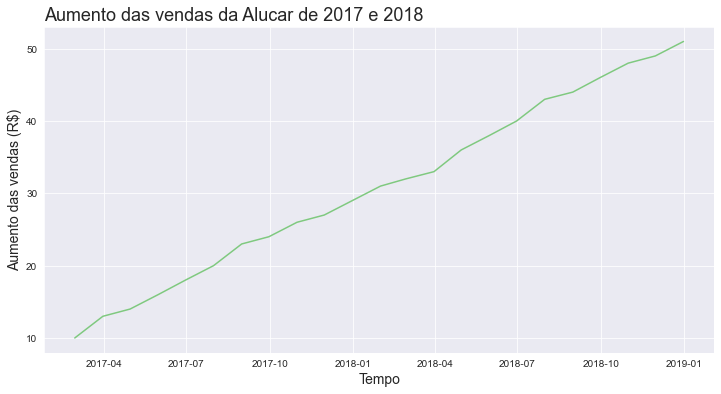

In [58]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Aumento das vendas da Alucar de 2017 e 2018', loc='Left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aumento das vendas (R$)', fontsize=14)
ax = ax

In [59]:
def plotar(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc='Left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    ax = ax

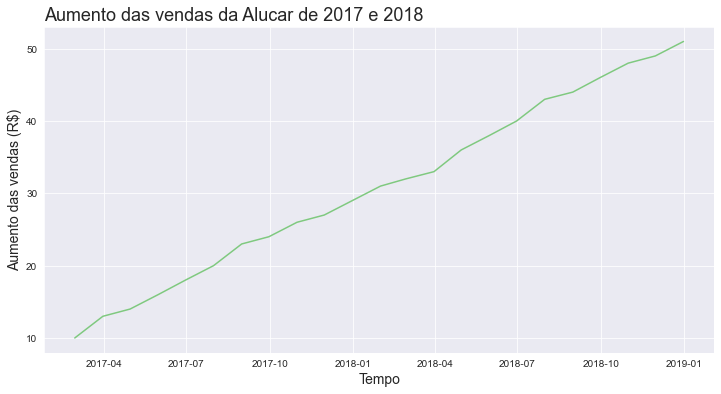

In [60]:
plotar('Aumento das vendas da Alucar de 2017 e 2018','Tempo','Aumento das vendas (R$)',
       'mes','aumento',alucar )

In [61]:
alucar['aceleracao'] = alucar['aumento'].diff()

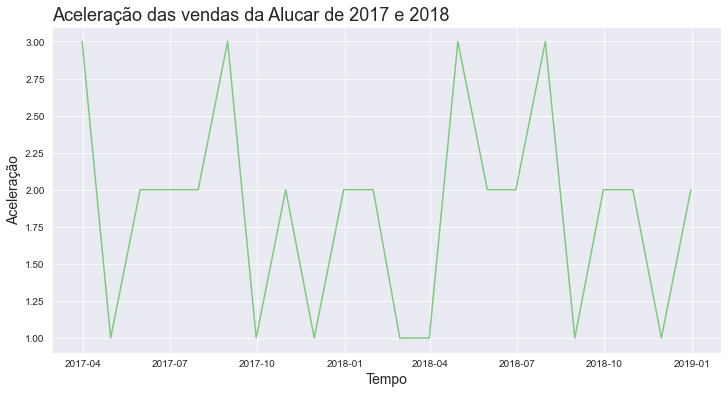

In [62]:
plotar('Aceleração das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aceleração', 'mes', 'aceleracao', alucar)